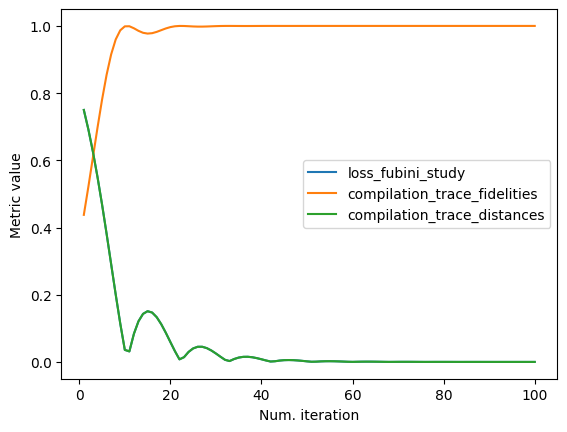

In [18]:
import qiskit
from qoop.compilation.qcompilation import QuantumCompilation
from qoop.core import state, ansatz
from qiskit.circuit import ParameterVector
import numpy as np
def create_cx_rx(num_qubits):
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    thetas = ParameterVector(
        'theta', 2 * num_qubits)
    t = 0
    for _ in range(num_qubits-1):
        i = np.random.randint(0, num_qubits - 1, size = 1)
        j = np.random.choice([x for x in range(num_qubits) if x != i])
        qc.cx(i, j)
        qc.rx(thetas[t], i)
        qc.rx(thetas[t+1], j)
        t += 2
    return qc

def ccx(num_qubits):

    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc.ccx(0, 1, 2)
    return qc

num_qubits = 3
u = create_cx_rx(num_qubits)
compiler = QuantumCompilation(
            u,
            vdagger = ccx(3).inverse(),
            optimizer = 'adam',
            metrics_func = [
                'loss_basic', 
                'compilation_trace_fidelities'
            ]
        )

In [19]:
qsp.thetas

array([-8.04928503e-07, -9.46290580e-06, -9.46290580e-06, -9.46290580e-06])

In [20]:
qsp.compiler.metrics['compilation_trace_fidelities'][-1]

0.9999999999326787

In [26]:
import qiskit.quantum_info


np.abs(np.trace(qiskit.quantum_info.Operator(u.assign_parameters(qsp.thetas)).data.transpose().conjugate() @ qiskit.quantum_info.Operator(ccx(3)).data) / 2**3)**2

0.14062499998878397

In [30]:
np.round(np.real(qiskit.quantum_info.Operator(u.assign_parameters(qsp.thetas)).data),2)

array([[ 1., -0., -0.,  0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0.,  1.,  0., -0.],
       [ 0., -0., -0.,  1., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0.,  0.,  1., -0.],
       [-0., -0., -0., -0.,  1., -0., -0.,  0.],
       [-0.,  1.,  0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0.,  0., -0., -0.,  1.],
       [-0.,  0.,  1., -0., -0., -0., -0., -0.]])

In [25]:
matrix = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1,  0, 0, 0, 0, 0, 0],
                   [0, 0,  1, 0, 0, 0, 0, 0],
                   [0, 0,  0, 1, 0, 0, 0, 0],
                   [0, 0,  0, 0, 1, 0, 0, 0],
                   [0, 0,  0, 0, 0, 1, 0, 0],
                   [0, 0,  0, 0, 0, 0, 0, 1],
                   [0, 0,  0, 0, 0, 0, 1, 0]]) + 0j

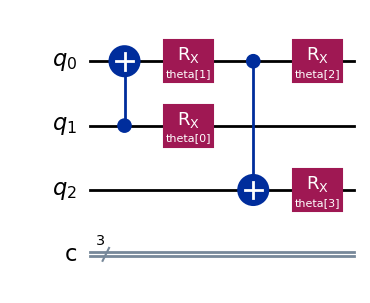

In [21]:
u.draw('mpl')

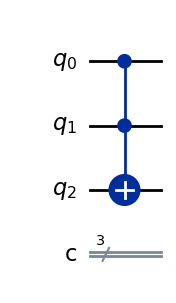

In [22]:
ccx(3).draw('mpl')